In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [93]:
path = '/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/summary_stats/alzheimers/ADSP_reference_panel/fine_mapping/annotations_dl/aggregate_finemap/pip_filt/'

def process(file):
    df = pd.read_csv(path + file, sep = '\t')
    df[['credible_set','credible_set_num' ]] = df['CREDIBLE_SET'].str.rsplit(':', 1, expand=True)
    uniq_cre_set = df.credible_set.unique()
    return df, uniq_cre_set 

In [94]:
bl_25, bl_cre_set= process('bellenguez_baseline_pip_0.25_analysis.tsv')
omics_25, omics_cre_set= process('bellenguez_omics_pip_0.25_analysis.tsv')
omics_dl_25, omics_dl_cre_set = process('bellenguez_omics_dl_pip_0.25_analysis.tsv')
susie_25, susie_cre_set = process('bellenguez_susie_pip_0.25_analysis.tsv')

In [249]:
print(len(susie_cre_set), len(bl_cre_set),len(omics_cre_set), len(omics_dl_cre_set))

113 84 77 88


47



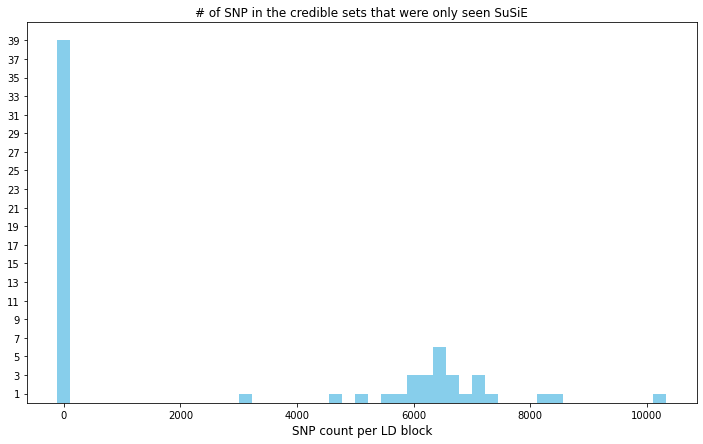

In [204]:
plt.figure(figsize=(12,7))
susie_only = set(susie_cre_set) - set(bl_cre_set) - set(omics_cre_set) - set(omics_dl_cre_set)
print(len(susie_only))
susie_only_count = susie_25[susie_25.credible_set.isin(susie_only)].groupby('CREDIBLE_SET').size().reset_index(name='COUNT')
plt.hist(susie_only_count.COUNT,47,color = 'skyblue', align='left')
plt.yticks(range(1,40,2))
plt.xlabel('SNP count per LD block', fontsize=12)
plt.title('# of SNP in the credible sets that were only seen SuSiE')
print()

In [205]:
susie_only_count.sort_values(by='COUNT', ascending = False).head(20)

,CREDIBLE_SET,COUNT
20,chr19:56000001-59000001:0,10443
32,chr3:21000001-24000001:0,8605
42,chr4:7000001-10000001:0,8261
44,chr5:124000001-127000001:0,7389
25,chr21:38000001-41000001:0,7311
26,chr2:116000001-119000001:0,7209
61,chr8:39000001-42000001:0,7184
18,chr17:75000001-78000001:0,6972
22,chr1:197000001-200000001:0,6869
43,chr5:107000001-110000001:0,6816


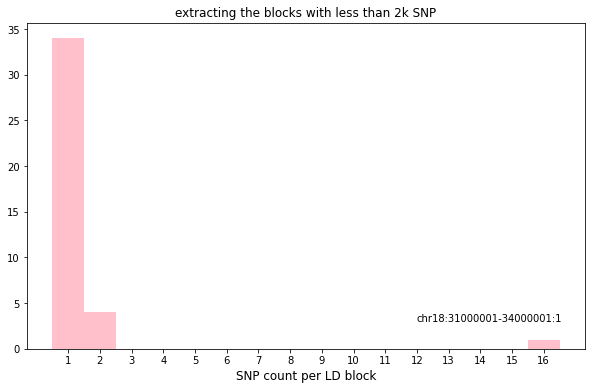

(39, 2)


,CREDIBLE_SET,COUNT
1,chr11:12000001-15000001:1,1
2,chr11:13000001-16000001:1,1
3,chr11:13000001-16000001:3,1
4,chr11:13000001-16000001:4,2
6,chr12:36000001-39000001:1,1
7,chr12:36000001-39000001:2,1
8,chr12:36000001-39000001:3,1
9,chr12:36000001-39000001:5,2
10,chr12:37000001-40000001:5,2
12,chr13:35000001-38000001:1,1


In [212]:
plt.figure(figsize=(10,6))
plt.hist(susie_only_count[susie_only_count.COUNT< 2000].COUNT,bins=range(1,16+2, 1),color = 'pink',align='left')
plt.xlabel('SNP count per LD block', fontsize=12)
plt.xticks(range(1,17))
plt.title('extracting the blocks with less than 2k SNP')
plt.text(12,3,'chr18:31000001-34000001:1')
plt.show()

print(susie_only_count[susie_only_count.COUNT< 2000].shape)
susie_only_count[susie_only_count.COUNT< 2000]

Text(0.5, 1.0, 'SNPs in unique ldblk that has less #SNP')

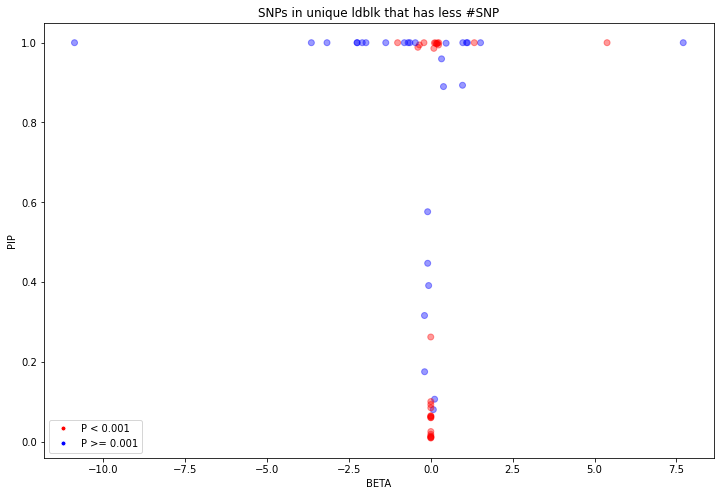

In [247]:
## the ones that has higer pip
plt.figure(figsize=(12,8))
check_susie_cre = susie_only_count[susie_only_count.COUNT< 2000].CREDIBLE_SET
check_susie_cre = susie_25[susie_25.CREDIBLE_SET.isin(check_susie_cre)]
colors = ['red' if p < 0.001 else 'blue' for p in check_susie_cre.P]
plt.scatter(check_susie_cre.BETA_MEAN, check_susie_cre.PIP, marker = 'o',alpha = 0.4, color = colors)
plt.xlabel('BETA')
plt.ylabel('PIP')
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=5, label='P < 0.001'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=5, label='P >= 0.001')
]

# Add legend
plt.legend(handles=legend_elements, loc='best')
plt.title('SNPs in unique ldblk that has less #SNP')

Text(0.5, 1.0, 'SNPs in unique ldblk that has #SNP > 2000')

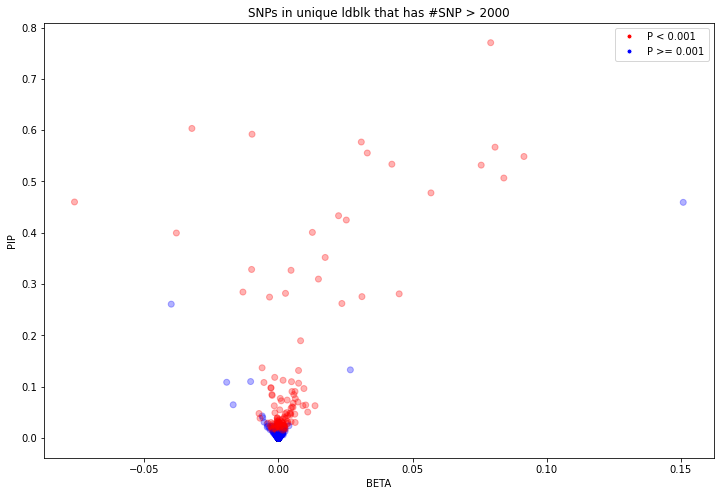

In [248]:
## the ones that has higer pip
plt.figure(figsize=(12,8))
check_susie_cre = susie_only_count[susie_only_count.COUNT > 2000].CREDIBLE_SET
check_susie_cre = susie_25[susie_25.CREDIBLE_SET.isin(check_susie_cre)]
colors = ['red' if p < 0.001 else 'blue' for p in check_susie_cre.P]
plt.scatter(check_susie_cre.BETA_MEAN, check_susie_cre.PIP, marker = 'o',alpha = 0.3, color = colors)
plt.xlabel('BETA')
plt.ylabel('PIP')
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=5, label='P < 0.001'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=5, label='P >= 0.001')
]

# Add legend
plt.legend(handles=legend_elements, loc='best')
plt.title('SNPs in unique ldblk that has #SNP > 2000')

In [254]:
check_susie_cre.sort_values(by='PIP', ascending= False)

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,credible_set,credible_set_num
138534,rs143481142,5,108498075,A,G,0.0026,258998,4.775970,0.000002,7.704370e-01,7.916371e-02,4.656970e-02,chr5:107000001-110000001:0,chr5:107000001-110000001,0
195948,rs183792468,7,18889543,A,G,0.0081,279337,-4.821760,0.000001,6.033130e-01,-3.230036e-02,2.760434e-02,chr7:17000001-20000001:0,chr7:17000001-20000001,0
206035,rs56212465,7,42381742,G,T,0.0880,283145,-4.835620,0.000001,5.920610e-01,-9.860536e-03,8.623214e-03,chr7:41000001-44000001:0,chr7:41000001-44000001,0
146025,rs189745566,5,125551164,C,T,0.0080,279962,4.770460,0.000002,5.768670e-01,3.089516e-02,2.782470e-02,chr5:124000001-127000001:0,chr5:124000001-127000001,0
244728,rs550942723,8,40896924,G,A,0.0011,249879,4.717320,0.000002,5.668190e-01,8.079465e-02,7.426221e-02,chr8:39000001-42000001:0,chr8:39000001-42000001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225396,rs4472446,7,115807589,C,T,0.4710,283145,-0.682927,0.494653,2.960160e-10,3.833981e-16,3.482905e-08,chr7:114000001-117000001:0,chr7:114000001-117000001,0
225677,rs6964676,7,115853952,A,G,0.1397,283145,-0.378151,0.705318,2.960150e-10,-2.299636e-15,5.014816e-08,chr7:114000001-117000001:0,chr7:114000001-117000001,0
223000,rs113727826,7,115404066,G,A,0.0117,280898,-1.587180,0.112472,2.960150e-10,-7.880159e-15,1.616749e-07,chr7:114000001-117000001:0,chr7:114000001-117000001,0
226466,rs184864712,7,115989448,T,A,0.0003,233257,-0.141434,0.887527,2.960150e-10,1.262750e-14,1.003882e-06,chr7:114000001-117000001:0,chr7:114000001-117000001,0


In [256]:
check_susie_cre[check_susie_cre.CREDIBLE_SET == 'chr5:107000001-110000001:0'].sort_values(by='PIP', ascending= False)

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,credible_set,credible_set_num
138534,rs143481142,5,108498075,A,G,0.0026,258998,4.775970,0.000002,0.770437,7.916371e-02,0.046570,chr5:107000001-110000001:0,chr5:107000001-110000001,0
138040,rs115785820,5,108435185,G,A,0.0027,258998,4.615040,0.000004,0.059938,5.433232e-03,0.022049,chr5:107000001-110000001:0,chr5:107000001-110000001,0
139517,rs181267407,5,108602599,C,T,0.0028,251632,4.622290,0.000004,0.048371,4.259698e-03,0.019370,chr5:107000001-110000001:0,chr5:107000001-110000001,0
139959,rs547180293,5,108653454,A,G,0.0007,252054,-3.129270,0.001752,0.043001,-6.050721e-03,0.029863,chr5:107000001-110000001:0,chr5:107000001-110000001,0
140701,rs537809291,5,108766411,T,C,0.0007,252054,-3.324610,0.000885,0.029218,-3.963723e-03,0.023890,chr5:107000001-110000001:0,chr5:107000001-110000001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139046,rs183803933,5,108552733,G,A,0.0052,275586,-0.029052,0.976823,0.000060,3.904856e-09,0.000108,chr5:107000001-110000001:0,chr5:107000001-110000001,0
140201,rs564473450,5,108688014,T,C,0.0037,279337,-0.029703,0.976304,0.000060,-3.357509e-09,0.000128,chr5:107000001-110000001:0,chr5:107000001-110000001,0
139271,rs183846046,5,108575537,T,G,0.0002,233257,0.000792,0.999368,0.000060,1.109821e-08,0.000551,chr5:107000001-110000001:0,chr5:107000001-110000001,0
139581,rs578100643,5,108609604,T,A,0.0027,259381,-0.002068,0.998350,0.000060,-1.775312e-09,0.000150,chr5:107000001-110000001:0,chr5:107000001-110000001,0


In [197]:
max(check_susie_cre.PIP)

0.999999

In [200]:
check_susie_cre.sort_values(by='PIP',ascending=False)

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,credible_set,credible_set_num
224650,rs534772978,7,115682334,T,C,0.0003,233257,-2.687490,0.007199,9.999990e-01,-6.398251e-01,5.835029e-02,chr7:114000001-117000001:4,chr7:114000001-117000001,4
222909,rs377375602,7,115386213,C,T,0.0020,268506,-4.350750,0.000014,9.999940e-01,-2.106809e-01,2.262264e-02,chr7:114000001-117000001:2,chr7:114000001-117000001,2
226053,rs181331437,7,115914142,T,G,0.0052,279337,4.399370,0.000011,9.995570e-01,1.091875e-01,1.423272e-02,chr7:114000001-117000001:1,chr7:114000001-117000001,1
222843,rs764471387,7,115374576,C,A,0.0003,233257,2.903420,0.003691,9.986990e-01,4.662242e-01,6.068909e-02,chr7:114000001-117000001:3,chr7:114000001-117000001,3
64648,rs185926389,3,22497284,C,T,0.0015,247869,4.563330,0.000005,9.978910e-01,1.789927e-01,2.727550e-02,chr3:21000001-24000001:1,chr3:21000001-24000001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225262,rs111398338,7,115788080,G,C,0.0141,281838,-0.300283,0.763961,2.960160e-10,9.550052e-15,1.474531e-07,chr7:114000001-117000001:0,chr7:114000001-117000001,0
225677,rs6964676,7,115853952,A,G,0.1397,283145,-0.378151,0.705318,2.960150e-10,-2.299636e-15,5.014816e-08,chr7:114000001-117000001:0,chr7:114000001-117000001,0
226466,rs184864712,7,115989448,T,A,0.0003,233257,-0.141434,0.887527,2.960150e-10,1.262750e-14,1.003882e-06,chr7:114000001-117000001:0,chr7:114000001-117000001,0
223000,rs113727826,7,115404066,G,A,0.0117,280898,-1.587180,0.112472,2.960150e-10,-7.880159e-15,1.616749e-07,chr7:114000001-117000001:0,chr7:114000001-117000001,0


In [202]:
check_susie_cre[check_susie_cre.CREDIBLE_SET =='chr7:114000001-117000001:4']

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,credible_set,credible_set_num
224650,rs534772978,7,115682334,T,C,0.0003,233257,-2.68749,0.007199,0.999999,-0.639825,0.05835,chr7:114000001-117000001:4,chr7:114000001-117000001,4


### checking with the credible set name (might not be accurate since the they might have different number)
e.g. chr19:56000001-59000001:0 could be the same as chr19:56000001-59000001:0 in other annotations

In [14]:
bl_cre_set = baseline_25.CREDIBLE_SET.unique()
omics_cre_set = omics_25.CREDIBLE_SET.unique()
omics_dl_cre_set = omics_dl_25.CREDIBLE_SET.unique()
susie_cre_set = susie_25.CREDIBLE_SET.unique()

print(len(bl_cre_set), len(omics_cre_set), len(omics_dl_cre_set), len(susie_cre_set))

111 104 115 168


In [25]:
susie_only = set(susie_cre_set) - set(bl_cre_set) - set(omics_cre_set) - set(omics_dl_cre_set)
susie_only_count = susie_25[susie_25.CREDIBLE_SET.isin(susie_only)].groupby('CREDIBLE_SET').size().reset_index(name='COUNT')

Text(0.5, 1.0, '# of SNP in the credible sets that were only seen SuSiE')

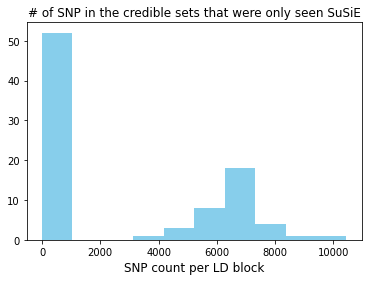

In [48]:
plt.hist(susie_only_count.COUNT,color = 'skyblue')
plt.xlabel('SNP count per LD block', fontsize=12)
plt.title('# of SNP in the credible sets that were only seen SuSiE')

In [58]:
## check the credible set that has less than 2000 SNPs (96 in total)
check_susie = susie_25[susie_25.CREDIBLE_SET.isin(susie_only_count[susie_only_count.COUNT< 2000].CREDIBLE_SET)]
check_susie

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET
40080,rs12478689,2,105736833,C,T,0.0017,251632,1.43467,1.513810e-01,1.000000,-0.446123,0.023980,chr2:104000001-107000001:2
48276,rs186583192,2,127132858,G,A,0.0018,252054,-2.39158,1.677610e-02,0.953883,-0.120311,0.035181,chr2:126000001-129000001:2
60180,rs185889117,2,237327083,A,T,0.0033,273836,5.24722,1.544120e-07,0.953845,0.088642,0.025974,chr2:236000001-239000001:1
60181,rs759895372,3,21851278,G,T,0.0005,233257,-3.32930,8.706550e-04,0.994423,-0.350133,0.052045,chr3:20000001-23000001:2
64648,rs185926389,3,22497284,C,T,0.0015,247869,4.56333,5.034900e-06,0.997891,0.178993,0.027276,chr3:21000001-24000001:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
377847,rs8082996,18,32142519,A,G,0.3639,283145,-4.87059,1.112660e-06,0.025518,-0.000252,0.001596,chr18:31000001-34000001:1
384581,rs377702,19,44859410,G,A,0.3910,282331,10.33710,4.789150e-25,0.045876,0.006122,0.027922,chr19:43000001-46000001:5
384582,rs387369,19,44859997,G,A,0.3900,282331,10.44940,1.473960e-25,0.332555,0.044418,0.062938,chr19:43000001-46000001:5
384583,rs403155,19,44860042,C,T,0.3896,282331,10.46070,1.309210e-25,0.617351,0.082485,0.064960,chr19:43000001-46000001:5


In [78]:
plt.figure(figsize=(13,10))
check_susie['logP'] = check_susie.
plt.scatter(check_susie.P, check_susie.BETA_MEAN, s= check_susie.PIP* 30, color = 'green')
plt.xlabel('P value', fontsize=14)
plt.ylabel('Beta', fontsize=14)

NameError: name 'log' is not defined

<Figure size 936x720 with 0 Axes>

In [85]:
import math
math.log(check_susie.P.values)

TypeError: only size-1 arrays can be converted to Python scalars

array([1.51381e-01, 1.67761e-02, 1.54412e-07, 8.70655e-04, 5.03490e-06,
       9.70271e-06, 5.39997e-03, 1.74868e-02, 2.30157e-02, 8.04315e-05,
       7.52019e-04, 5.37228e-06, 1.72782e-08, 1.03136e-08, 6.02082e-08,
       1.14337e-07, 2.09589e-03, 2.14908e-06, 3.61977e-03, 1.56443e-06,
       3.69109e-03, 1.35675e-05, 7.19920e-03, 1.08565e-05, 8.87707e-02,
       2.86673e-02, 3.86773e-03, 5.96694e-02, 1.59077e-01, 7.86602e-06,
       2.74955e-02, 8.84459e-02, 8.39904e-03, 1.51731e-05, 2.38544e-05,
       3.54921e-07, 6.46385e-03, 3.56329e-02, 3.84379e-02, 2.38700e-03,
       6.81458e-06, 5.36210e-02, 5.55440e-33, 3.06039e-33, 5.08151e-32,
       4.38897e-32, 3.27269e-32, 3.27527e-03, 2.82004e-02, 1.05658e-05,
       1.24340e-02, 1.47105e-02, 9.47376e-01, 9.09885e-01, 1.24296e-05,
       3.54044e-09, 4.96878e-09, 2.32969e-09, 3.25247e-08, 3.20985e-10,
       3.89987e-08, 4.56969e-08, 5.89298e-08, 4.93314e-08, 4.00252e-08,
       7.08946e-08, 2.30071e-08, 2.78335e-08, 1.19946e-07, 1.226